In [1]:
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from gradboost import GradBoost
from BUTIF import BUTIF, Clustering
from sklearn.linear_model import LogisticRegression

from selector_methods import Selector

from sklearn.metrics import accuracy_score as accuracy
from pickle import load
from sklearn.cross_validation import train_test_split, KFold

from time import clock
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datasets = load(open('datasets.pkl', 'rb'))
data_name = []
for data_key, data in datasets.items():
    data_name.append(data_key)

In [3]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [2, 3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000, 2500, 3000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator 10 max_leaf:  2 [ 0.67681122  0.01395024]
n_estimator 10 max_leaf:  3 [ 0.81369732  0.00493854]
n_estimator 10 max_leaf:  5 [ 0.87439046  0.02539527]
n_estimator 10 max_leaf:  10 [ 0.85148903  0.04154467]
n_estimator 50 max_leaf:  2 [ 0.67681122  0.01395024]
n_estimator 50 max_leaf:  3 [ 0.82127308  0.00591135]
n_estimator 50 max_leaf:  5 [ 0.87822187  0.02009241]
n_estimator 50 max_leaf:  10 [ 0.88200975  0.0240867 ]
n_estimator 100 max_leaf:  2 [ 0.67681122  0.01395024]
n_estimator 100 max_leaf:  3 [ 0.82122954  0.01497989]
n_estimator 100 max_leaf:  5 [ 0.87822187  0.02009241]
n_estimator 100 max_leaf:  10 [ 0.87055904  0.03073848]
n_estimator 200 max_leaf:  2 [ 0.67681122  0.01395024]
n_estimator 200 max_leaf:  3 [ 0.82506095  0.01123876]
n_estimator 200 max_leaf:  5 [ 0.87060258  0.02414353]
n_estimator 200 max_leaf:  10 [ 0.87826541  0.01473942]
n_estimator 500 max_leaf:  2 [ 0.6616597   0.01255656]
n_estimator 500 max_leaf:  3 [ 0.83642459  0.01510729]
n_estimator 50

In [4]:
np.save("BUTIF_1_cross_validation", scores)

In [40]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 1:
        i += 1
        continue
    if i == 2:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator 10 max_leaf:  3 [ 0.85513545  0.01179201]
n_estimator 10 max_leaf:  5 [ 0.85513545  0.01179201]
n_estimator 10 max_leaf:  10 [ 0.85513545  0.01179201]
n_estimator 50 max_leaf:  3 [ 0.85513545  0.01179201]
n_estimator 50 max_leaf:  5 [ 0.85513545  0.01179201]
n_estimator 50 max_leaf:  10 [ 0.85513545  0.01179201]
n_estimator 100 max_leaf:  3 [ 0.85513545  0.01179201]
n_estimator 100 max_leaf:  5 [ 0.85513545  0.01179201]
n_estimator 100 max_leaf:  10 [ 0.84089043  0.00838242]
n_estimator 200 max_leaf:  3 [ 0.85513545  0.01179201]
n_estimator 200 max_leaf:  5 [ 0.85513545  0.01179201]
n_estimator 200 max_leaf:  10 [  8.46588440e-01   6.14608241e-04]
n_estimator 500 max_leaf:  3 [ 0.85513545  0.01179201]
n_estimator 500 max_leaf:  5 [ 0.85513545  0.01179201]
n_estimator 500 max_leaf:  10 [ 0.84376358  0.00338035]
n_estimator 1000 max_leaf:  3 [ 0.85513545  0.01179201]
n_estimator 1000 max_leaf:  5 [ 0.86080931  0.00778421]
n_estimator 1000 max_leaf:  10 [ 0.84661258  0.0064249

In [41]:
np.save("BUTIF_2_cross_validation", scores)

In [42]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 2:
        i += 1
        continue
    if i == 3:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator 10 max_leaf:  3 [ 0.88967136  0.01659875]
n_estimator 10 max_leaf:  5 [ 0.92488263  0.02176906]
n_estimator 10 max_leaf:  10 [ 0.95070423  0.01521301]
n_estimator 50 max_leaf:  3 [ 0.91079812  0.00878323]
n_estimator 50 max_leaf:  5 [ 0.9342723   0.01196953]
n_estimator 50 max_leaf:  10 [ 0.96244131  0.01447046]
n_estimator 100 max_leaf:  3 [ 0.9084507   0.01149995]
n_estimator 100 max_leaf:  5 [ 0.9342723   0.00878323]
n_estimator 100 max_leaf:  10 [ 0.96713615  0.00331975]
n_estimator 200 max_leaf:  3 [ 0.91079812  0.0066395 ]
n_estimator 200 max_leaf:  5 [ 0.95070423  0.01724993]
n_estimator 200 max_leaf:  10 [  9.64788732e-01   1.11022302e-16]
n_estimator 500 max_leaf:  3 [ 0.90140845  0.00995925]
n_estimator 500 max_leaf:  5 [ 0.95305164  0.01196953]
n_estimator 500 max_leaf:  10 [ 0.96713615  0.00331975]
n_estimator 1000 max_leaf:  3 [ 0.91314554  0.00331975]
n_estimator 1000 max_leaf:  5 [ 0.95539906  0.00878323]
n_estimator 1000 max_leaf:  10 [  9.64788732e-01   1.1

In [46]:
np.save("BUTIF_3_cross_validation", scores)

In [50]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 3:
        i += 1
        continue
    if i == 4:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator:", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator: 10 max_leaf:  3 [ 0.71874202  0.04664376]
n_estimator: 10 max_leaf:  5 [ 0.71874202  0.04664376]
n_estimator: 10 max_leaf:  10 [ 0.71874202  0.04664376]
n_estimator: 50 max_leaf:  3 [ 0.71874202  0.04664376]
n_estimator: 50 max_leaf:  5 [ 0.71874202  0.04664376]
n_estimator: 50 max_leaf:  10 [ 0.72105683  0.04337012]
n_estimator: 100 max_leaf:  3 [ 0.71874202  0.04664376]
n_estimator: 100 max_leaf:  5 [ 0.71874202  0.04664376]
n_estimator: 100 max_leaf:  10 [ 0.71186143  0.03854973]
n_estimator: 200 max_leaf:  3 [ 0.7164272  0.0499174]
n_estimator: 200 max_leaf:  5 [ 0.71874202  0.04664376]
n_estimator: 200 max_leaf:  10 [ 0.70954662  0.04169153]
n_estimator: 500 max_leaf:  3 [ 0.70949872  0.05491138]
n_estimator: 500 max_leaf:  5 [ 0.71644317  0.04510619]
n_estimator: 500 max_leaf:  10 [ 0.70035121  0.03410754]
n_estimator: 1000 max_leaf:  3 [ 0.70719987  0.05351073]
n_estimator: 1000 max_leaf:  5 [ 0.7072318   0.04377892]
n_estimator: 1000 max_leaf:  10 [ 0.70488506  0.0

In [63]:
np.save("BUTIF_4_cross_validation", scores)

In [64]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator:", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator: 10 max_leaf:  3 [ 0.69734151  0.05356156]
n_estimator: 10 max_leaf:  5 [ 0.79550102  0.03335277]
n_estimator: 10 max_leaf:  10 [ 0.77300613  0.00500918]
n_estimator: 50 max_leaf:  3 [ 0.73415133  0.06800936]
n_estimator: 50 max_leaf:  5 [ 0.79550102  0.01610227]
n_estimator: 50 max_leaf:  10 [ 0.79550102  0.00765165]
n_estimator: 100 max_leaf:  3 [ 0.75051125  0.06222955]
n_estimator: 100 max_leaf:  5 [ 0.81595092  0.0265061 ]
n_estimator: 100 max_leaf:  10 [ 0.81390593  0.02258765]
n_estimator: 200 max_leaf:  3 [ 0.77505112  0.04489672]
n_estimator: 200 max_leaf:  5 [ 0.82208589  0.03128233]
n_estimator: 200 max_leaf:  10 [ 0.81799591  0.02570512]
n_estimator: 500 max_leaf:  3 [ 0.78732106  0.03623731]
n_estimator: 500 max_leaf:  5 [ 0.83026585  0.02313642]
n_estimator: 500 max_leaf:  10 [ 0.81390593  0.02892052]
n_estimator: 1000 max_leaf:  3 [ 0.77709611  0.05067285]
n_estimator: 1000 max_leaf:  5 [ 0.82617587  0.01610227]
n_estimator: 1000 max_leaf:  10 [ 0.83026585  0

In [65]:
np.save("BUTIF_5_cross_validation", scores)

In [68]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 5:
        i += 1
        continue
    if i == 6:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator:", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator: 10 max_leaf:  3 [ 0.82790026  0.02095959]
n_estimator: 10 max_leaf:  5 [ 0.8220863   0.01316498]
n_estimator: 10 max_leaf:  10 [ 0.81238518  0.00974977]
n_estimator: 50 max_leaf:  3 [ 0.83370301  0.02097265]
n_estimator: 50 max_leaf:  5 [ 0.82402429  0.01472786]
n_estimator: 50 max_leaf:  10 [ 0.83176502  0.01661416]
n_estimator: 100 max_leaf:  3 [ 0.83370301  0.01870062]
n_estimator: 100 max_leaf:  5 [ 0.8220751   0.01153097]
n_estimator: 100 max_leaf:  10 [ 0.83946095  0.01664058]
n_estimator: 200 max_leaf:  3 [ 0.8336918   0.01625702]
n_estimator: 200 max_leaf:  5 [ 0.83370301  0.02398041]
n_estimator: 200 max_leaf:  10 [ 0.83562979  0.02585587]
n_estimator: 500 max_leaf:  3 [ 0.83948335  0.01156839]
n_estimator: 500 max_leaf:  5 [ 0.83948335  0.02322611]
n_estimator: 500 max_leaf:  10 [ 0.84142134  0.01768623]
n_estimator: 1000 max_leaf:  3 [ 0.83562979  0.01475913]
n_estimator: 1000 max_leaf:  5 [ 0.84334812  0.02497254]
n_estimator: 1000 max_leaf:  10 [ 0.83172021  0

In [69]:
np.save("BUTIF_6_cross_validation", scores)

In [70]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 6:
        i += 1
        continue
    if i == 7:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator:", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator: 10 max_leaf:  3 [ 0.76470588  0.01155212]
n_estimator: 10 max_leaf:  5 [ 0.77183601  0.01403566]
n_estimator: 10 max_leaf:  10 [ 0.76648841  0.00666962]
n_estimator: 50 max_leaf:  3 [ 0.76827094  0.00908916]
n_estimator: 50 max_leaf:  5 [ 0.77005348  0.01512528]
n_estimator: 50 max_leaf:  10 [ 0.76292335  0.01533391]
n_estimator: 100 max_leaf:  3 [ 0.76827094  0.00908916]
n_estimator: 100 max_leaf:  5 [ 0.77361854  0.01653051]
n_estimator: 100 max_leaf:  10 [ 0.79144385  0.00756264]
n_estimator: 200 max_leaf:  3 [ 0.76827094  0.00908916]
n_estimator: 200 max_leaf:  5 [ 0.77183601  0.01764616]
n_estimator: 200 max_leaf:  10 [ 0.78431373  0.00252088]
n_estimator: 500 max_leaf:  3 [ 0.76827094  0.00908916]
n_estimator: 500 max_leaf:  5 [ 0.77361854  0.01653051]
n_estimator: 500 max_leaf:  10 [ 0.79500891  0.00504176]
n_estimator: 1000 max_leaf:  3 [ 0.76648841  0.00666962]
n_estimator: 1000 max_leaf:  5 [ 0.77361854  0.01333924]
n_estimator: 1000 max_leaf:  10 [ 0.78253119  0

In [71]:
np.save("BUTIF_7_cross_validation", scores)

In [ ]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 7:
        i += 1
        continue
    if i == 8:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(BUTIF(max_leaf=max_leaf, 
                            linear_model=LogisticRegression(n_jobs=-1), 
                            task='regression'), n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator:", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator: 10 max_leaf:  3 [ 0.67881944  0.01493459]
n_estimator: 10 max_leaf:  5 [ 0.6875      0.01853659]
n_estimator: 10 max_leaf:  10 [ 0.71180556  0.02831512]


In [ ]:
np.save("BUTIF_8_cross_validation", scores)

In [10]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i == 1:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_leaves = [2, 3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000]
    
    scores = np.zeros((len(n_estimators), len(max_leaves), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_leaf in enumerate(max_leaves):
            sc = []
            for train, test in cv:
                clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=max_leaf), 
                                n_estimator, loss='exp', shrinkage=0.1)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator", n_estimator, 
                  "max_leaf: ", max_leaf,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator 10 max_leaf:  2 [ 0.90107976  0.01132947]
n_estimator 10 max_leaf:  3 [ 0.93164403  0.01834386]
n_estimator 10 max_leaf:  5 [ 0.88975967  0.00480271]
n_estimator 10 max_leaf:  10 [ 0.89346047  0.02712934]
n_estimator 50 max_leaf:  2 [ 0.92393765  0.02340341]
n_estimator 50 max_leaf:  3 [ 0.91253048  0.00561938]
n_estimator 50 max_leaf:  5 [ 0.89354754  0.00510241]
n_estimator 50 max_leaf:  10 [ 0.90491118  0.02845582]
n_estimator 100 max_leaf:  2 [ 0.93538837  0.01923136]
n_estimator 100 max_leaf:  3 [ 0.90116684  0.01047614]
n_estimator 100 max_leaf:  5 [ 0.88975967  0.00480271]
n_estimator 100 max_leaf:  10 [ 0.87447753  0.02479994]
n_estimator 200 max_leaf:  2 [ 0.93160049  0.02444922]
n_estimator 200 max_leaf:  3 [ 0.90869906  0.00976222]
n_estimator 200 max_leaf:  5 [ 0.88218391  0.01015958]
n_estimator 200 max_leaf:  10 [ 0.89341693  0.03558287]
n_estimator 500 max_leaf:  2 [ 0.92781261  0.02127522]
n_estimator 500 max_leaf:  3 [ 0.90116684  0.01047614]
n_estimator 50

In [11]:
np.save("gradboost_1_cross_validation", scores)

In [35]:
i = 0
for data_key, data in datasets.items():
    if i < 9:
        i += 1
        continue
    if i == 10:
        break
    i += 1
    print(data_key)

banknote authentication


In [67]:
i = 0
for data_key, data in datasets.items():
    start = clock()
    if i != 4:
        i += 1
        continue
    if i == 5:
        break
    X = np.vstack((data.X_train, data.X_val))
    y = np.hstack((data.Y_train, data.Y_val)).astype('int')
    
    cv = KFold(X.shape[0], n_folds=3, shuffle=True, random_state=241)
    max_depths = [2, 3, 5, 10]
    n_estimators = [10, 50, 100, 200, 500, 1000, 1500, 2000, 2500, 3000]
    
    scores = np.zeros((len(n_estimators), len(max_depths), 2))
    for j, n_estimator in enumerate(n_estimators):
        for k, max_depth in enumerate(max_depths):
            sc = []
            for train, test in cv:
                clf = XGBClassifier(max_depth=max_depth, n_estimators=n_estimator)
                clf.fit(X[train], y[train])
                y_pred = clf.predict(X[test])
                sc += [accuracy(y_pred, y[test])]
            sc = np.array(sc)
            scores[j, k, :] = np.array([sc.mean(), sc.std()])
            print("n_estimator", n_estimator, 
                  "max_depth: ", max_depth,
                 scores[j, k])
    i += 1
    
    print("time: ", clock() - start)

n_estimator 10 max_depth:  2 [ 0.87116564  0.02003673]
n_estimator 10 max_depth:  3 [ 0.87116564  0.03470463]
n_estimator 10 max_depth:  5 [ 0.86912065  0.03623731]
n_estimator 10 max_depth:  10 [ 0.86503067  0.03046966]
n_estimator 50 max_depth:  2 [ 0.86707566  0.03409679]
n_estimator 50 max_depth:  3 [ 0.8609407   0.03792891]
n_estimator 50 max_depth:  5 [ 0.86707566  0.03792891]
n_estimator 50 max_depth:  10 [ 0.86912065  0.02848341]
n_estimator 100 max_depth:  2 [ 0.87116564  0.03975915]
n_estimator 100 max_depth:  3 [ 0.87116564  0.03975915]
n_estimator 100 max_depth:  5 [ 0.86503067  0.03506427]
n_estimator 100 max_depth:  10 [ 0.86298569  0.02758842]
n_estimator 200 max_depth:  2 [ 0.87116564  0.04100192]
n_estimator 200 max_depth:  3 [ 0.86503067  0.03128233]
n_estimator 200 max_depth:  5 [ 0.86298569  0.03220453]
n_estimator 200 max_depth:  10 [ 0.86503067  0.03046966]
n_estimator 500 max_depth:  2 [ 0.87116564  0.03612172]
n_estimator 500 max_depth:  3 [ 0.8609407   0.024709

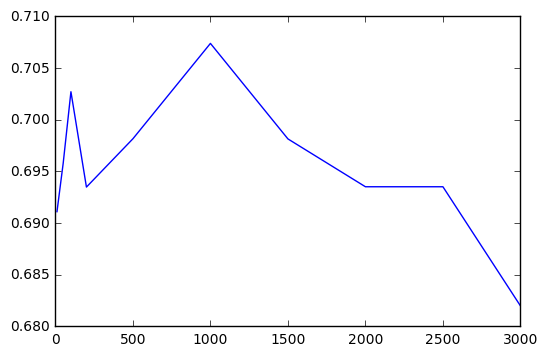

In [53]:
plt.plot(n_estimators, scores.max(axis=1)[:, 0])

In [17]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [23]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=15)

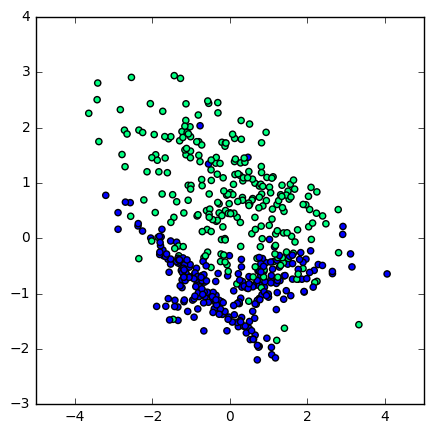

In [24]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.show()

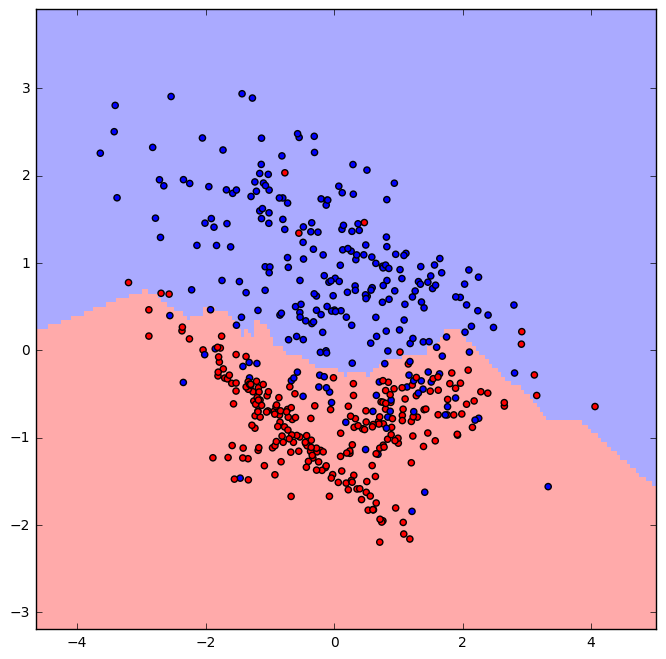

In [26]:
clf = GradBoost(BUTIF(max_leaf=7, 
                      linear_model=LogisticRegression(n_jobs=-1), 
                      task='regression'), 
                50, loss='exp', shrinkage=0.1)
clf.fit(X, y)

plot_surface(X, y, clf)

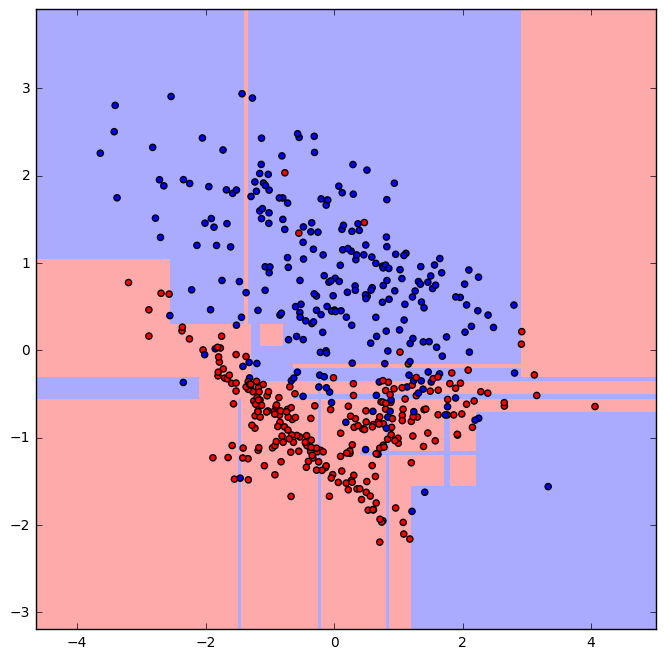

In [27]:
clf = GradBoost(DecisionTreeRegressor(max_leaf_nodes=5),
                200, loss='exp', shrinkage=0.1)
clf.fit(X, y)

plot_surface(X, y, clf)

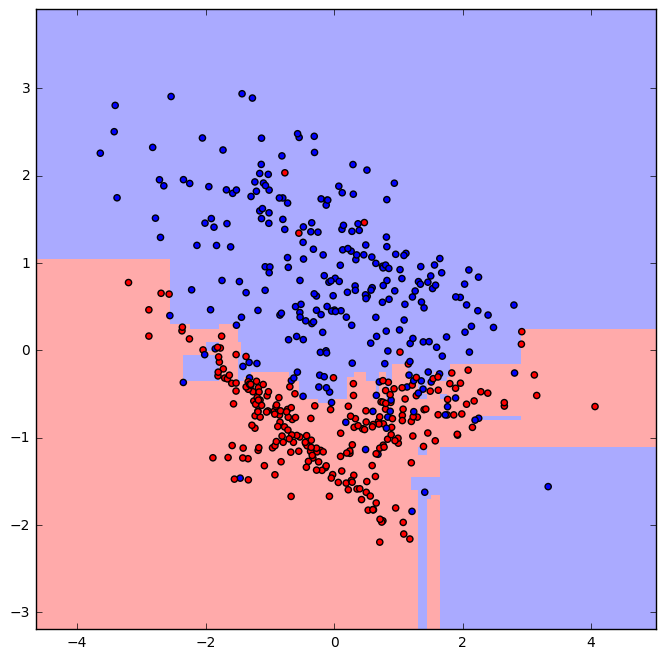

In [28]:
clf = XGBClassifier(n_estimators=200)
clf.fit(X, y)

plot_surface(X, y, clf)